# Data Cleaning for EC1B1

In [ ]:
# pip install openpyxl is used to install a module that allows us to read excel files into jupyter 
# Depending on the laptop, this may not need to be installed. Just check if the pd.read_excel() function works.

In [ ]:
pip install openpyxl


In [200]:
# Installing modules for plotting graphs, pandas for the dataframe,numpy for data analsysis, 
# json in case I need it.
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import json 


In [2]:
# use pd.read_excel() function to import excel files containing raw data from IFS into 
# pandas dataframes in the jupyter notebook.
# Stored in separate variables for each of the dataframes: US data and Spain data (our country)
df_US = pd.read_excel('../US.xlsx')
df_Spain = pd.read_excel('../Spain.xlsm')


In [ ]:
# Renaming columns of the dataframe for the US.
df_US = df_US.rename(columns={'Unnamed: 1': 'Month series', 'Unnamed: 2':'International Reserves',\
                               'Unnamed: 3': 'Consumer Price Index'})
df_US

In [ ]:
# Renaming columns of the dataframe for Spain 
df_Spain = df_Spain.rename(columns = {'Unnamed: 1': 'Month series', 'Unnamed: 2': 'Industrial Production Index',\
'Unnamed: 3': 'Exchange Rates', 'Unnamed: 4': 'International Reserves', 'Unnamed: 5': 'Consumer Price Index' })
df_Spain

Spain Dataframe Variables

In [ ]:
# This is where I construct all the variables for Spain 
Spain_data = {
    'Month series': pd.date_range(start = 'Jan 1960', periods = 372, freq = 'MS'),
    'Exchange rate value': df_Spain['Exchange Rates'][1:],
    'Industrial Production': df_Spain['Industrial Production Index'][1:],
    'Consumer Price Index': df_Spain['Consumer Price Index'][1:],
    'US Consumer Price Index': df_US['Consumer Price Index'][1:],
    'International Reserves': df_Spain['International Reserves'][1:]
}
# Creating a dictionary of values from the dataframes from Spain 
df_month_series = pd.DataFrame(Spain_data)
# Convert into pandas and then make column data points numeric 
df_month_series['Exchange rate value'] = pd.to_numeric(df_month_series['Exchange rate value'])
df_month_series['Industrial Production'] = pd.to_numeric(df_month_series['Industrial Production'])
df_month_series['Consumer Price Index'] = pd.to_numeric(df_month_series['Consumer Price Index'])
df_month_series['US Consumer Price Index'] = pd.to_numeric(df_month_series['US Consumer Price Index'])
# Convert into a pandas dataframe with month series as index
df_month_series.set_index('Month series', inplace=True)
# Create a column for variable Monthly growth in nominal exchange rate and then set pandas columns as variable
# Create all monthly growth variables this way 
df_month_series['Monthly Growth in Nominal Exchange Rate %'] = df_month_series['Exchange rate value'].pct_change() * 100 
Monthly_growth_in_Nominal_Exchange_Rate = df_month_series['Monthly Growth in Nominal Exchange Rate %']
# Note: First year for Industrial production data is empty and thus NaN values appear
df_month_series['Monthly Growth in Industrial Production %'] = df_month_series['Industrial Production'].pct_change() * 100
Monthly_growth_in_Industrial_Production = df_month_series['Monthly Growth in Industrial Production %']
# Monthly inflation as a variable - calculated with monthly % change in CPI 
df_month_series['Monthly Inflation Rate'] = df_month_series['Consumer Price Index'].pct_change() * 100
Monthly_inflation_rate = df_month_series['Monthly Inflation Rate']
# Real exchange rate in terms of dollars. We have nominal exchange rate for Spains currency in terms of US dollars.
# We calculate real exchange rate in terms of dollars for Spain by multiplying nominal exchange rate with US CPI values.
# Then dividing it by the CPI of Spain at the same time - CPI represents the price level of the countries at that time.
df_month_series['Real exchange rate'] = (df_month_series['Exchange rate value'] * df_month_series['US Consumer Price Index'])\
                                         / df_month_series['Consumer Price Index']
Real_exchange_rate = df_month_series['Real exchange rate']
df_month_series['Monthly growth in Real exchange rate %'] = df_month_series['Real exchange rate'].pct_change() * 100
Monthly_growth_in_real_exchange_rate = df_month_series['Monthly growth in Real exchange rate %']
df_month_series

In [ ]:
#Spain variables continue being defined over here with the growth in production versus 12 months ago 
# First 12 months have no data as the first 12 months don't have values and the last 12 by virtue of not having a next year after 1990.
# Calculated by shifting down the column by 12 rows and then minusing it from the original position.
df_month_series['Growth in Production versus 12 months ago'] = df_month_series['Monthly Growth in Industrial Production %']\
      - df_month_series['Monthly Growth in Industrial Production %'].shift(12)
Growth_in_production_versus_12_months_ago = df_month_series['Growth in Production versus 12 months ago']
# Calculated variable of index value of international reserves with 1960 as the Jan as the base 
df_month_series['Index of value of international reserves'] = df_month_series['International Reserves']\
        / df_month_series['International Reserves'][0] * 100
Index_of_value_of_international_reserves = df_month_series['Index of value of international reserves']
df_month_series



US dataframe variables 

In [ ]:
# Constructing variables for the US dataframe
US_data = {
    'Month series': pd.date_range(start = 'Jan 1960', periods = 372, freq = 'MS'),
    'US Consumer Price Index': df_US['Consumer Price Index'][1:],
    'US International Reserves': df_US['International Reserves'][1:]
}
df_US_month_series = pd.DataFrame(US_data)
df_US_month_series['US Consumer Price Index'] = pd.to_numeric(df_US_month_series['US Consumer Price Index'])
df_US_month_series['US International Reserves'] = pd.to_numeric(df_US_month_series['US International Reserves'])
df_US_month_series.set_index('Month series', inplace=True)
# Creating variable for monthly inflation in the US
df_US_month_series['Monthly Inflation Rate'] = df_US_month_series['US Consumer Price Index'].pct_change() * 100
Monthly_US_inflation_rate = df_US_month_series['Monthly Inflation Rate']
# Creating index of value of international reserves for the US
df_US_month_series['Index of value of international reserves'] = df_US_month_series['US International Reserves']\
        / df_US_month_series['US International Reserves'][0] * 100
US_index_of_value_of_international_reserves = df_US_month_series['Index of value of international reserves']
df_US_month_series

In [ ]:
# Spain Variables
Monthly_growth_in_Nominal_Exchange_Rate
Monthly_growth_in_Industrial_Production
Monthly_inflation_rate
Real_exchange_rate
Monthly_growth_in_real_exchange_rate
Growth_in_production_versus_12_months_ago
Index_of_value_of_international_reserves
# US variables 
Monthly_US_inflation_rate
US_index_of_value_of_international_reserves

**Checking for Outliers and interpolating missing pieces of data**

Comments: For the first year of 1960 in the monthly data for the Industrial Production Index, there is no raw data from the IFS
website. Therefore, any monthly series or that column will have NaN values in the first 12 rows. 
It's hard to interpolate this result as there are no means on either side of these values.
Also for growth of production versus 12 months ago, since there is no data for for the first 12 months, the first 24 months are NaN
values due to the calculation being that month - one year before it and the first 12 months will definitely be empty as there is no
1959 data to take on here.

In [138]:
mean = df_US_month_series['US International Reserves'].mean()
standard_deviation = df_US_month_series['US International Reserves'].std()
standard_deviation



15579.415014160906

In [226]:
# We will calculate anomalies using an identification method where values either 3 standard deviations above or below the mean
# of that series will be classified as anomalies.
#testing out the number of outliers in each series 
def count_outliers(df, start_date = None, end_date = None):
    outlier_counts = {}
    
    # Iterate over each column in the DataFrame except the first one (assuming it's the time series)
    for column in df.columns[0:]:
        data_series = df[column]
        mean = data_series.mean()
        std_dev = data_series.std()
        
        # Calculate the lower and upper bounds for outliers
        lower_bound = mean - 3 * std_dev
        upper_bound = mean + 3 * std_dev
        
        # Count the number of outliers in the column and apply a start and end date to filter results
        if start_date and end_date:
            data_series = data_series.loc[(df.index < start_date) | (df.index > end_date)]
        
        outliers_count = ((data_series < lower_bound) | (data_series > upper_bound)).sum()
        
        # Store the count of outliers for the current column
        outlier_counts[column] = outliers_count
    
    return outlier_counts
start_date = pd.to_datetime('1960-01-01')
end_date = pd.to_datetime('1960-01-01')
outlier_counts = count_outliers(df_month_series, start_date, end_date)
outlier_counts

{'Exchange rate value': 0,
 'Industrial Production': 0,
 'Consumer Price Index': 0,
 'US Consumer Price Index': 0,
 'International Reserves': 6,
 'Monthly Growth in Nominal Exchange Rate %': 3,
 'Monthly Growth in Industrial Production %': 14,
 'Monthly Inflation Rate': 5,
 'Real exchange rate': 0,
 'Monthly growth in Real exchange rate %': 6,
 'Growth in Production versus 12 months ago': 2,
 'Index of value of international reserves': 6}

In [227]:
outlier_counts_US = count_outliers(df_US_month_series, start_date, end_date)
outlier_counts_US

{'US Consumer Price Index': 0,
 'US International Reserves': 14,
 'Monthly Inflation Rate': 2,
 'Index of value of international reserves': 14}

Notable Outlier counts in data series such as Monthly Growth in Industrial Production %, US International Reserves,
Index of international reserves for the US with each of these having 14 outliers.

By going through and excluding different time periods when counting outliers, we found that all 12 months of 1990 for US international reserves and subsequently the indexed value data series were outliers - there are only 14 in total for the whole series.

We also found that 11 of the 14 Monthly Industrial Production Growth anomalies occured between 1980 - 1990. 
Also, all 6 of the Spanish international reserves and consequently indexed value data series outliers occured in the last 6 months of 1990.

All 14 US reserves anomalies happened between 1989 Nov to 1990 December. 

The vast majority of the international reserves outliers come from the year 1990 and this suggests something specific about the data
rather than a coincidence where it truly doesn't fit the trend.


 All of the anomalies occured in the last months possible where the reserves exceeded being more than 3 standard deviations higher
 than the mean but seeemed to follow the pattern of increase that had happened before.

 Spanish reserves had a sudden acceleration in the last 6 months whilst US reserves had a sudden acceleration from 1989
 April onwards to 1990's end.

In [ ]:
# As a result of this pattern, we decided not to replace the outliers found in the year 1990
# Replacing outlier values with missing NaN values
def replace_outliers_with_Nan(df, start_date, end_date):
    # Copy the original DataFrame to avoid modifying the original dataframe
    modified_df = df.copy()

    # Iterate over each column in the DataFrame
    for column in modified_df.columns:
        # Calculate mean and standard deviation
        mean = modified_df[column].mean()
        std_dev = modified_df[column].std()

        # Define the outlier threshold
        threshold = 3 * std_dev

        # Find outliers and create a start date and end date to exclude 1990
        outliers = ((modified_df.index < start_date) | (modified_df.index > end_date)) & \
                ((modified_df[column] < mean - threshold) | (modified_df[column] > mean + threshold))

        # Replace outliers with Nan
        modified_df.loc[outliers, column] = np.nan

    return modified_df
#setting date time to make filter in a certain date range
start_date = pd.to_datetime('1990-01-01')
end_date = pd.to_datetime('1990-12-01')
# modified means having replaced outliers with Nan
modified_df_month_series = replace_outliers_with_Nan(df_month_series, start_date, end_date)
modified_df_month_series

In [ ]:
# Applying function to US pandas dataframe 
# All variables and data series now modified for 
modified_df_US_month_series = replace_outliers_with_Nan(df_US_month_series, start_date, end_date)
modified_df_US_month_series

In [230]:
#Setting all outliers to Nan values and then updating variables and each data series
# Spain Variables
modified_Monthly_growth_in_Nominal_Exchange_Rate = modified_df_month_series['Monthly Growth in Nominal Exchange Rate %']
modified_Monthly_growth_in_Industrial_Production = modified_df_month_series['Monthly Growth in Industrial Production %']
modified_Monthly_inflation_rate = modified_df_month_series['Monthly Inflation Rate']
modified_Real_exchange_rate = modified_df_month_series['Real exchange rate']
modified_Monthly_growth_in_real_exchange_rate = modified_df_month_series['Monthly growth in Real exchange rate %']
modified_Growth_in_production_versus_12_months_ago = modified_df_month_series['Growth in Production versus 12 months ago']
modified_Index_of_value_of_international_reserves = modified_df_month_series['Index of value of international reserves']
# US variables 
modified_Monthly_US_inflation_rate = modified_df_US_month_series['Monthly Inflation Rate']
modified_US_index_of_value_of_international_reserves =modified_df_US_month_series['Index of value of international reserves']

In [ ]:
#Interpolating the data by using the means of the series value before and after the gap to plug in a new value
#Interpolate the Nan values that have non Nan values before and after them
def interpolate_data(df):
    for col in df.columns[1:]: # exclude the first column as it's the month series
        for i in range(1, len(df[col]) - 1): # i - element in range of the length of the column 
            if pd.isna(df.iloc[i, df.columns.get_loc(col)]): # if it is a NaN value
                if not pd.isna(df.iloc[i - 1, df.columns.get_loc(col)]) and not pd.isna(df.iloc[i + 1, df.columns.get_loc(col)]): # if the two values before and after are non-Nan
                    df.iloc[i, df.columns.get_loc(col)] = (df.iloc[i - 1, df.columns.get_loc(col)] + df.iloc[i + 1, df.columns.get_loc(col)]) / 2 # Calculate the mean and replace
                else:
                    df.iloc[i, df.columns.get_loc(col)] = np.nan # else leave it as NaN value 
    return df
#Interpolating the dataframe that has all of Spains variables
interpolated_df_month_series = interpolate_data(modified_df_month_series)
interpolated_df_month_series


In [ ]:
#Interpolating dataframe with all of US variables
interpolated_df_US_month_series = interpolate_data(modified_df_US_month_series)
interpolated_df_US_month_series

In [233]:
#New Interpolated data series/variables being updated again
# Spain Variables
interpolated_Monthly_growth_in_Nominal_Exchange_Rate = interpolated_df_month_series['Monthly Growth in Nominal Exchange Rate %']
interpolated_Monthly_growth_in_Industrial_Production = interpolated_df_month_series['Monthly Growth in Industrial Production %']
interpolated_Monthly_inflation_rate = interpolated_df_month_series['Monthly Inflation Rate']
interpolated_Real_exchange_rate = interpolated_df_month_series['Real exchange rate']
interpolated_Monthly_growth_in_real_exchange_rate = interpolated_df_month_series['Monthly growth in Real exchange rate %']
interpolated_Growth_in_production_versus_12_months_ago = interpolated_df_month_series['Growth in Production versus 12 months ago']
interpolated_Index_of_value_of_international_reserves = interpolated_df_month_series['Index of value of international reserves']
# US variables 
interpolated_Monthly_US_inflation_rate = interpolated_df_US_month_series['Monthly Inflation Rate']
interpolated_US_index_of_value_of_international_reserves =interpolated_df_US_month_series['Index of value of international reserves']

Plotting Graphs and Time Series


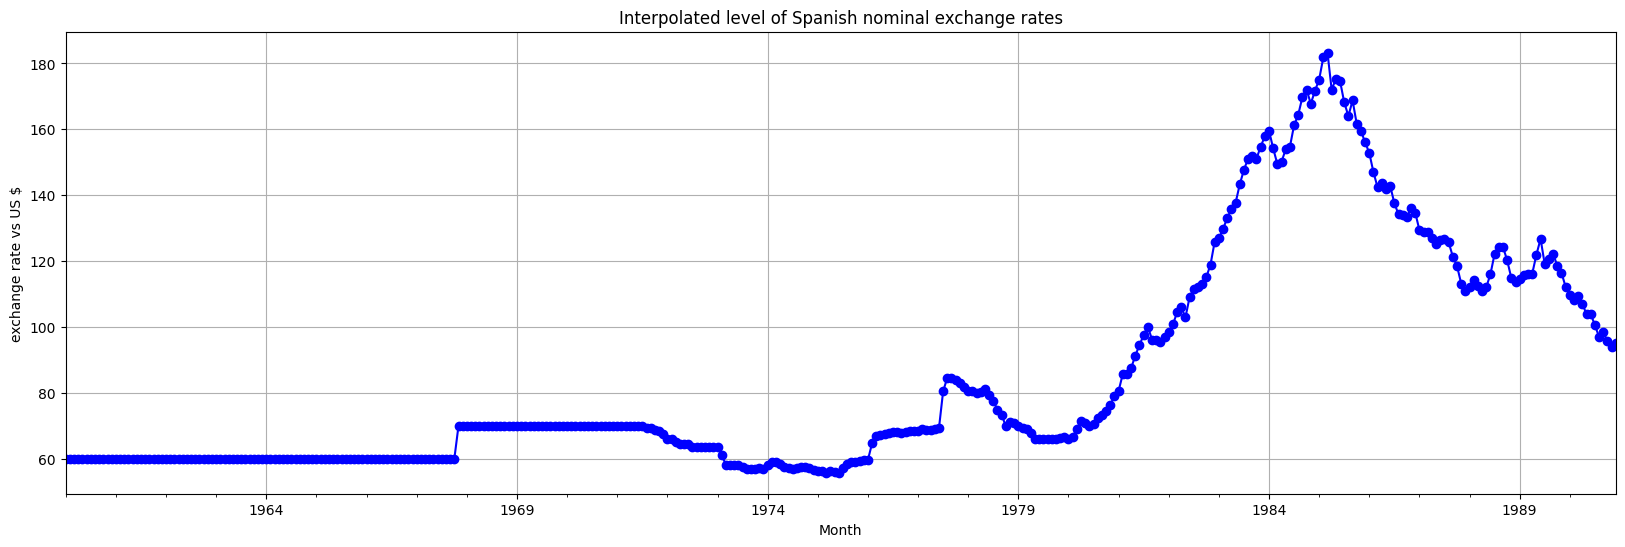

In [209]:
#levels of nominal exchange rates Spain
plt.figure(figsize=(20, 6))
interpolated_df_month_series['Exchange rate value'].plot(kind='line', marker='o', color='blue', linestyle='-')
plt.title('Interpolated level of Spanish nominal exchange rates vs US $')
plt.xlabel('Month')
plt.ylabel('exchange rate vs US $')
plt.grid(True)
plt.show()

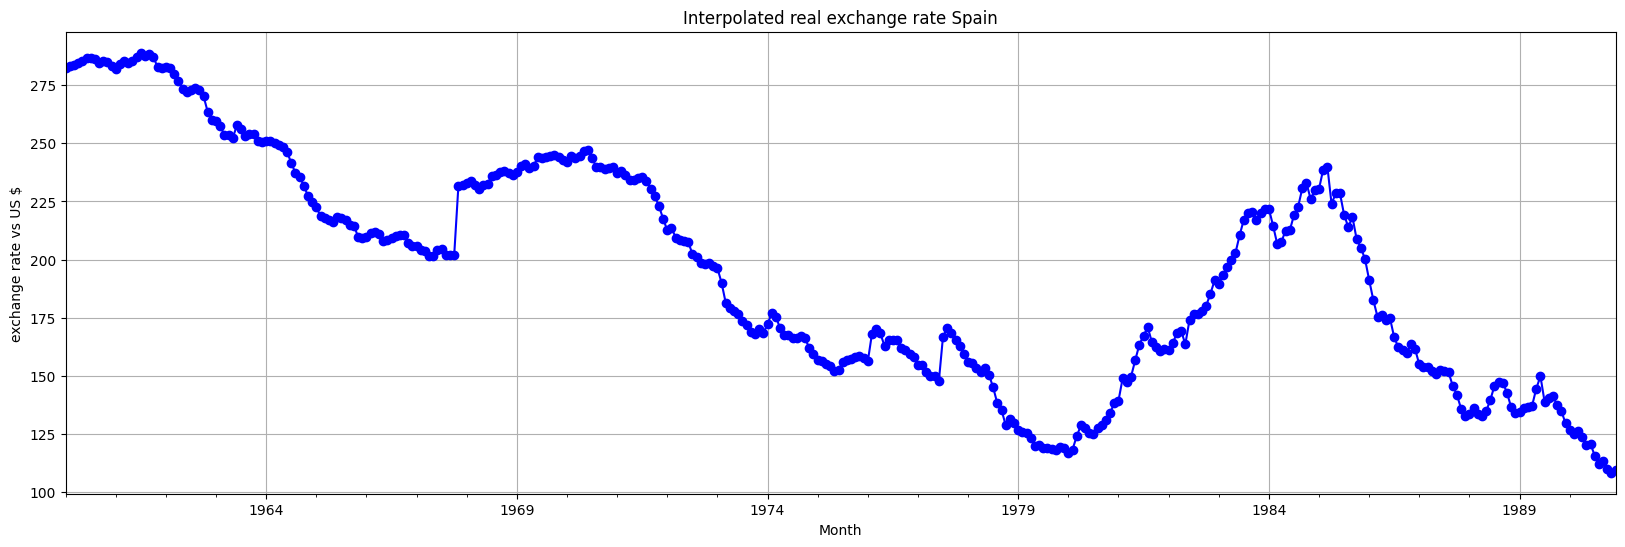

In [208]:
#levels of real exchange rates Spain
plt.figure(figsize=(20, 6))
interpolated_df_month_series['Real exchange rate'].plot(kind='line', marker='o', color='blue', linestyle='-')
plt.title('Interpolated real exchange rate Spain')
plt.xlabel('Month')
plt.ylabel('exchange rate vs US $')
plt.grid(True)
plt.show()

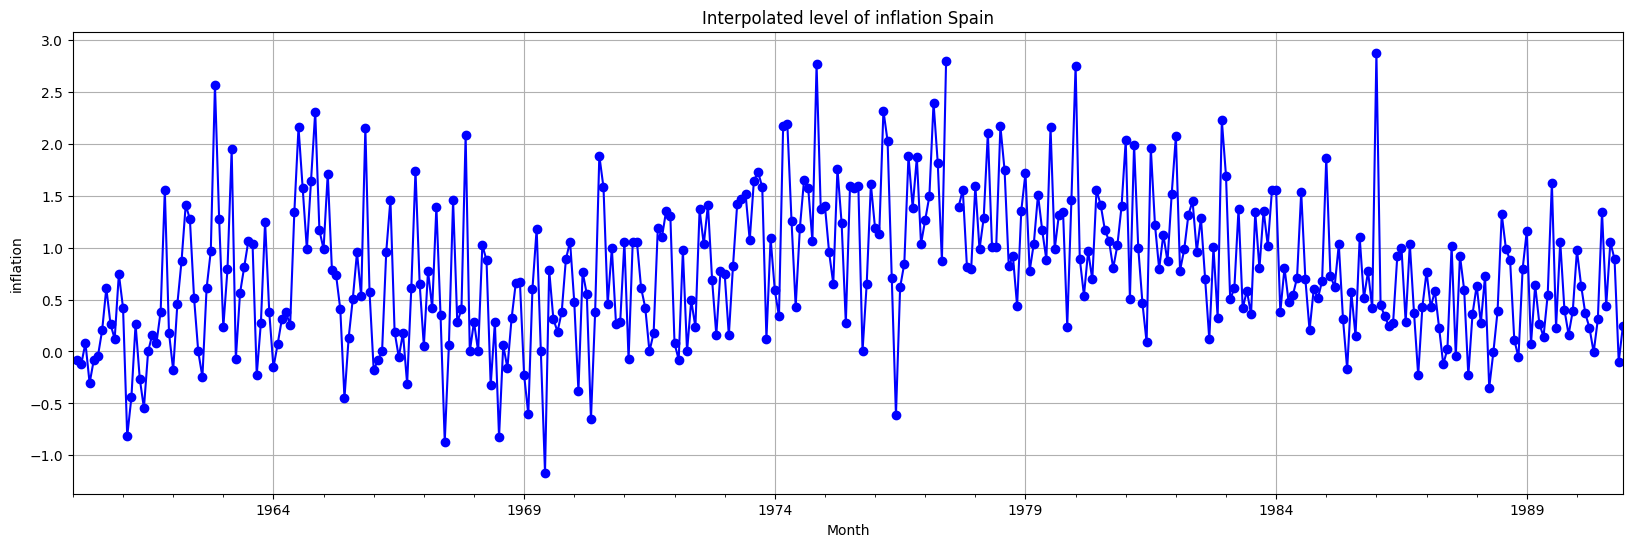

In [213]:
#levels of inflation Spain
plt.figure(figsize=(20, 6))
interpolated_df_month_series['Monthly Inflation Rate'].plot(kind='line', marker='o', color='blue', linestyle='-')
plt.title('Interpolated level of inflation Spain')
plt.xlabel('Month')
plt.ylabel('inflation')
plt.grid(True)
plt.show()

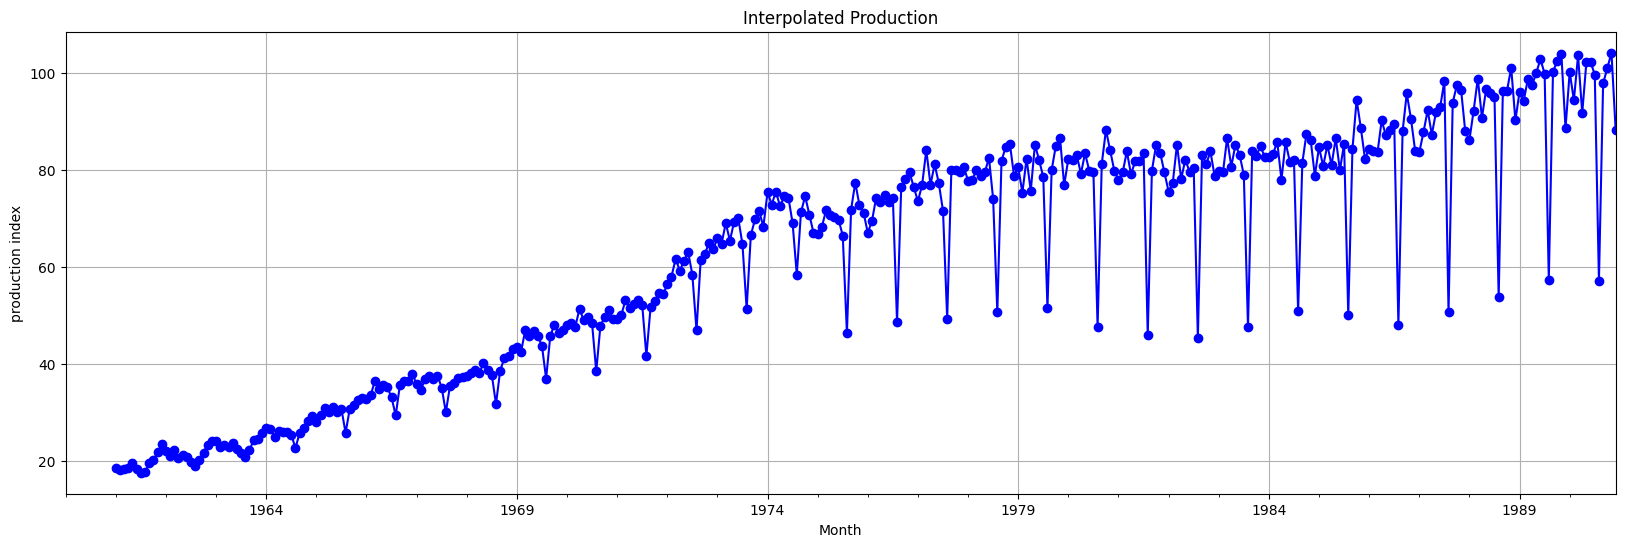

In [210]:
#levels of production
plt.figure(figsize=(20, 6))
interpolated_df_month_series['Industrial Production'].plot(kind='line', marker='o', color='blue', linestyle='-')
plt.title('Interpolated Production')
plt.xlabel('Month')
plt.ylabel('production index')
plt.grid(True)
plt.show()

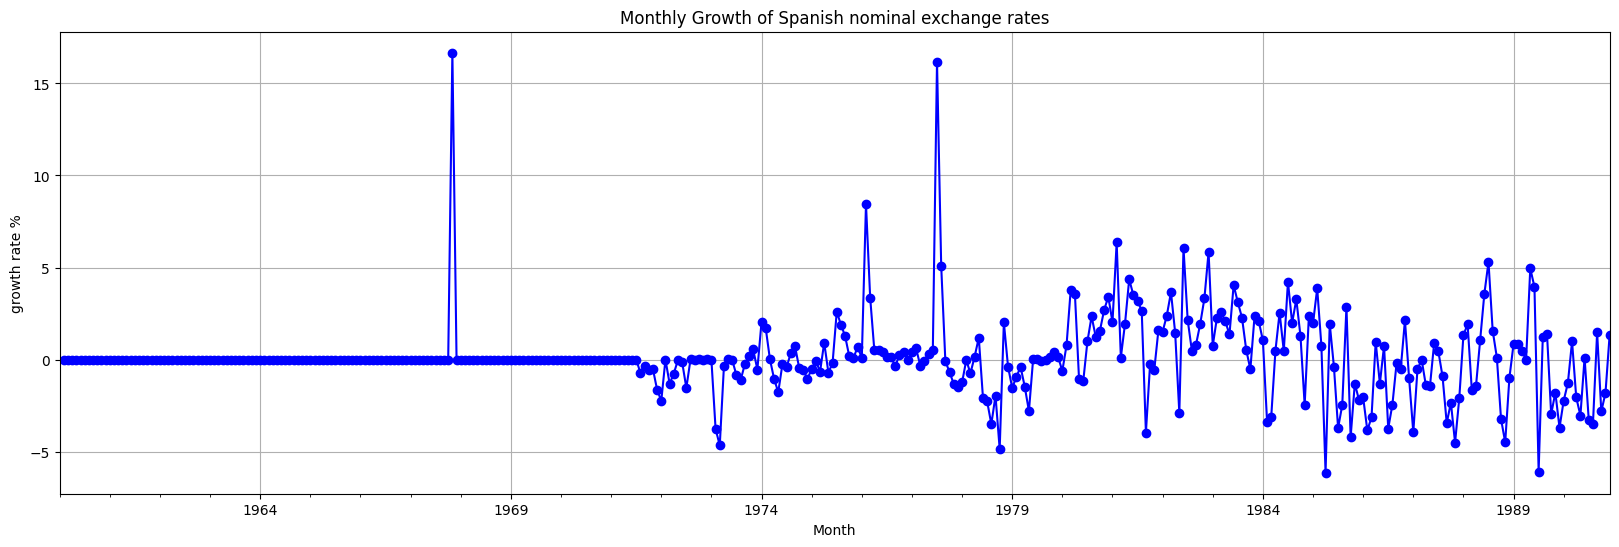

In [177]:
# The month that we decided that Spain most likely left Bretton Woods was August 1971
# Plot monthly time series monthly growth of Spanish nominal exchange rates vs US $
plt.figure(figsize=(20, 6))
df_month_series['Monthly Growth in Nominal Exchange Rate %'].plot(kind='line', marker='o', color='blue', linestyle='-')
plt.title('Monthly Growth of Spanish nominal exchange rates')
plt.xlabel('Month')
plt.ylabel('growth rate %')
plt.grid(True)
plt.show()

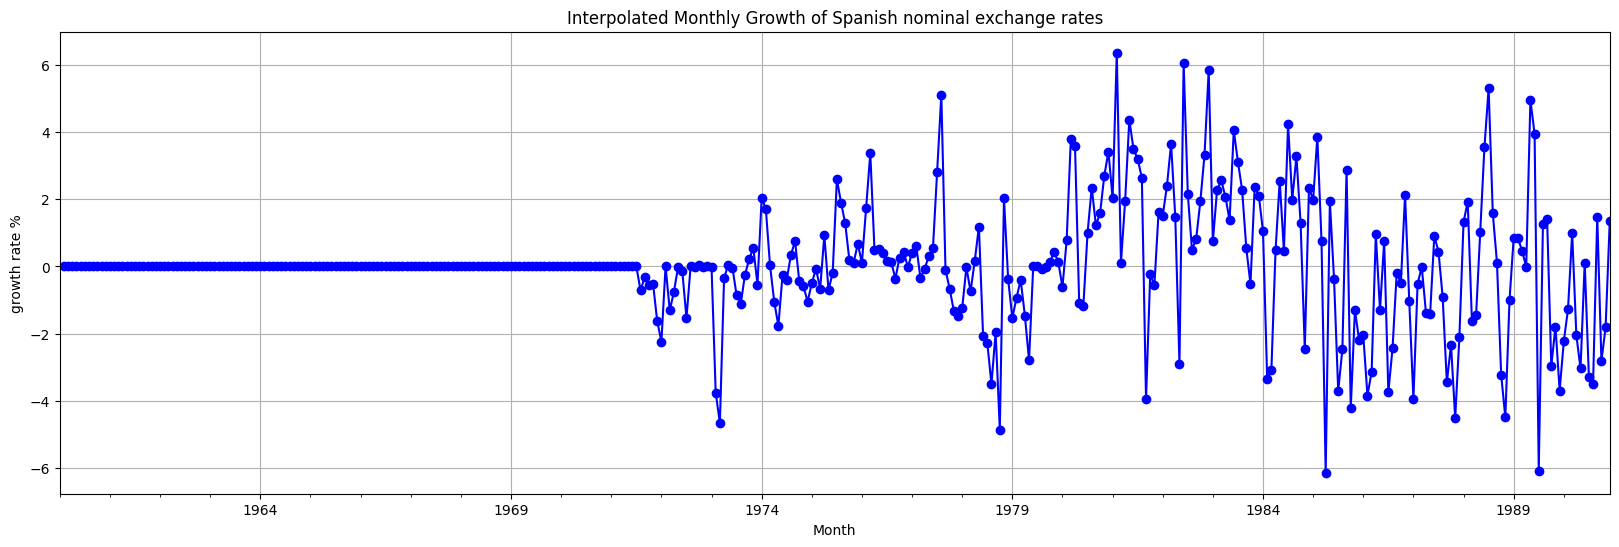

In [179]:
# The month that we decided that Spain most likely left Bretton Woods was August 1971
# Plot monthly time series monthly growth of Spanish nominal exchange rates vs US $
plt.figure(figsize=(20, 6))
interpolated_Monthly_growth_in_Nominal_Exchange_Rate.plot(kind='line', marker='o', color='blue', linestyle='-')
plt.title('Interpolated Monthly Growth of Spanish nominal exchange rates')
plt.xlabel('Month')
plt.ylabel('growth rate %')
plt.grid(True)
plt.show()

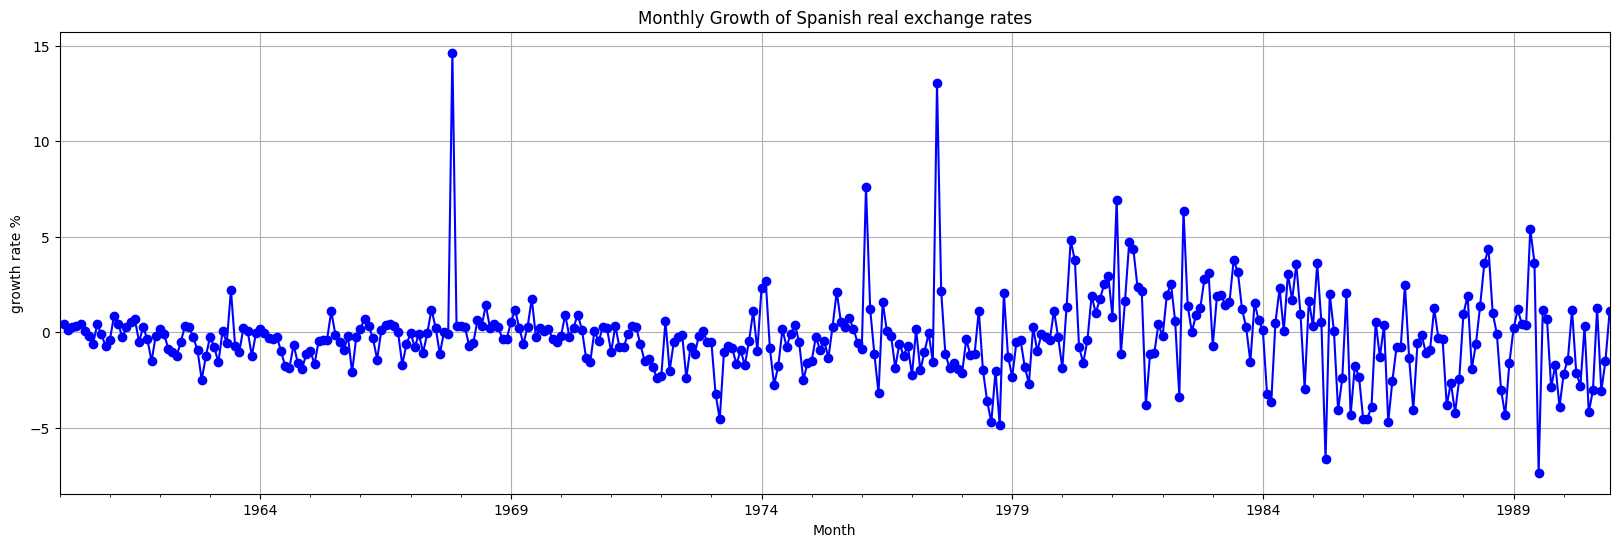

In [180]:
# Plot monthly time series of monthly growth of Spanish real exchange rates vs US $
plt.figure(figsize=(20, 6))
df_month_series['Monthly growth in Real exchange rate %'].plot(kind='line', marker='o', color='blue', linestyle='-')
plt.title('Monthly Growth of Spanish real exchange rates')
plt.xlabel('Month')
plt.ylabel('growth rate %')
plt.grid(True)
plt.show()

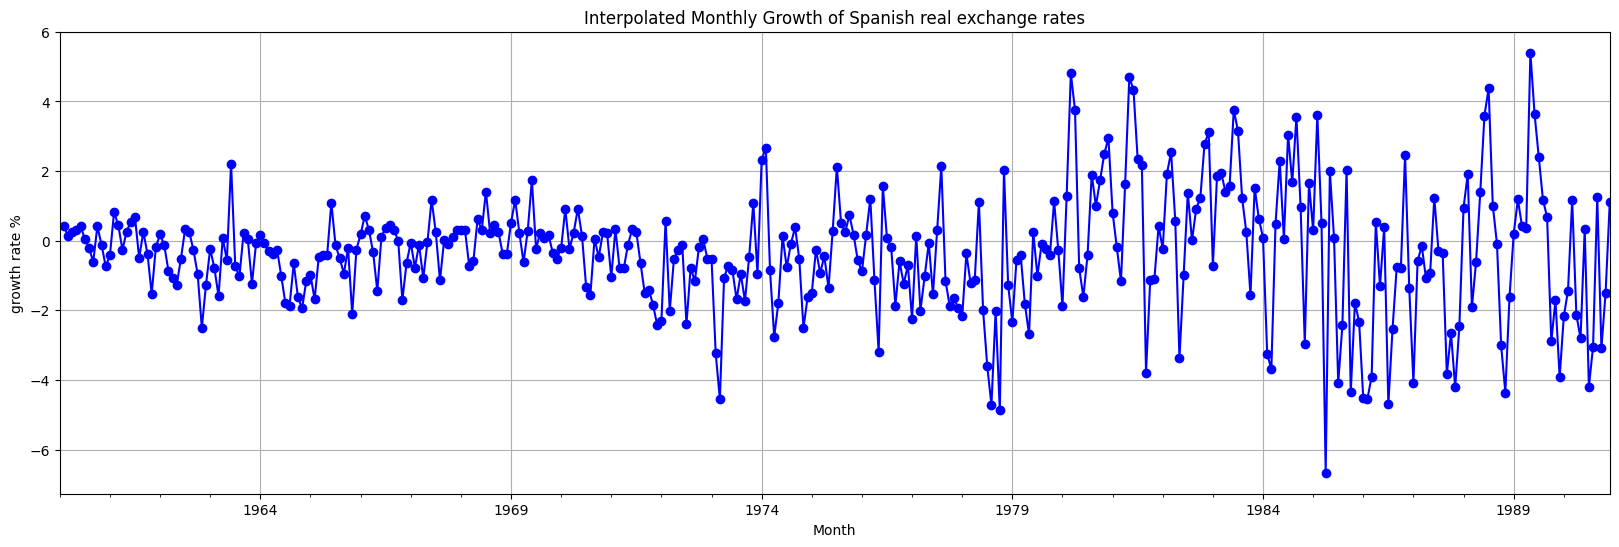

In [181]:
# Plot monthly time series of monthly growth of Spanish real exchange rates vs US $
plt.figure(figsize=(20, 6))
interpolated_Monthly_growth_in_real_exchange_rate.plot(kind='line', marker='o', color='blue', linestyle='-')
plt.title('Interpolated Monthly Growth of Spanish real exchange rates')
plt.xlabel('Month')
plt.ylabel('growth rate %')
plt.grid(True)
plt.show()

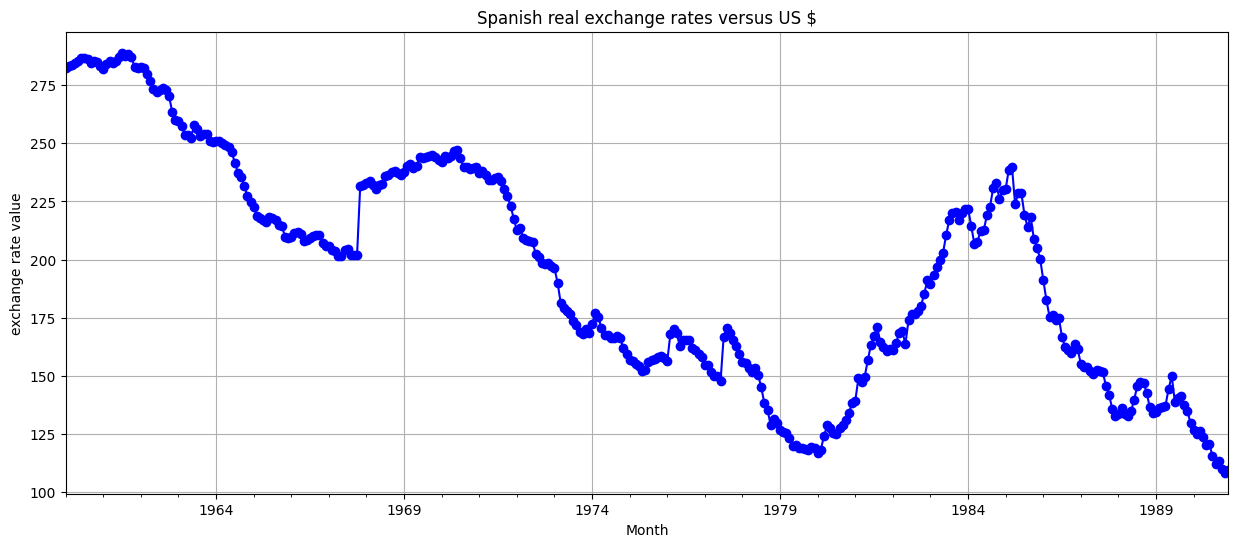

In [182]:
# Plot monthly time series of Spanish real exchange rates versus US $
plt.figure(figsize=(15, 6))
df_month_series['Real exchange rate'].plot(kind='line', marker='o', color='blue', linestyle='-')
plt.title('Spanish real exchange rates versus US $')
plt.xlabel('Month')
plt.ylabel('exchange rate value')
plt.grid(True)
plt.show()

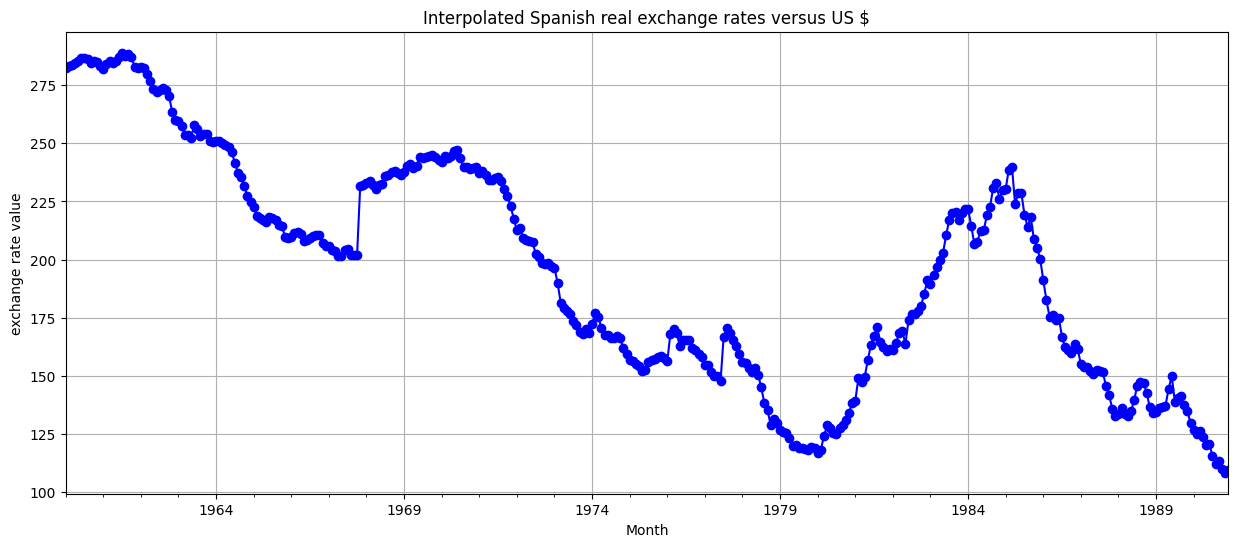

In [183]:
# Plot monthly time series of Spanish real exchange rates versus US $
plt.figure(figsize=(15, 6))
interpolated_Real_exchange_rate.plot(kind='line', marker='o', color='blue', linestyle='-')
plt.title('Interpolated Spanish real exchange rates versus US $')
plt.xlabel('Month')
plt.ylabel('exchange rate value')
plt.grid(True)
plt.show()

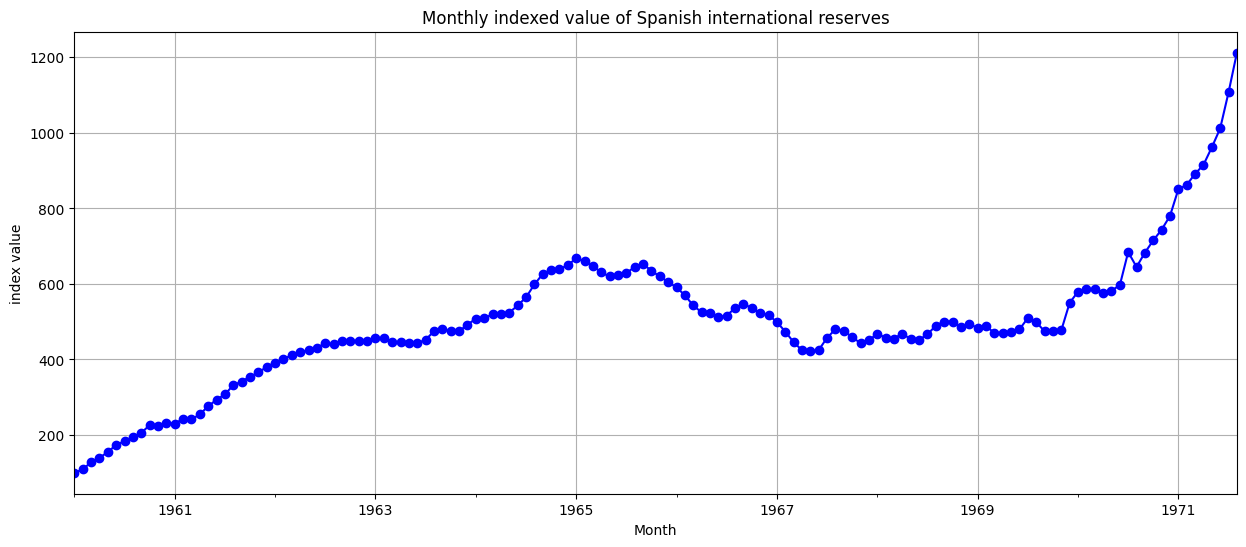

In [185]:
# Plot monthly time series
# Plotting indexed value of Spanish international reserves up till exit of US from Bretton woods in August 1971
plt.figure(figsize=(15, 6))
df_month_series['Index of value of international reserves'][0:140].plot(kind='line', marker='o', color='blue', linestyle='-')
plt.title('Monthly indexed value of Spanish international reserves')
plt.xlabel('Month')
plt.ylabel('index value')
plt.grid(True)
plt.show()

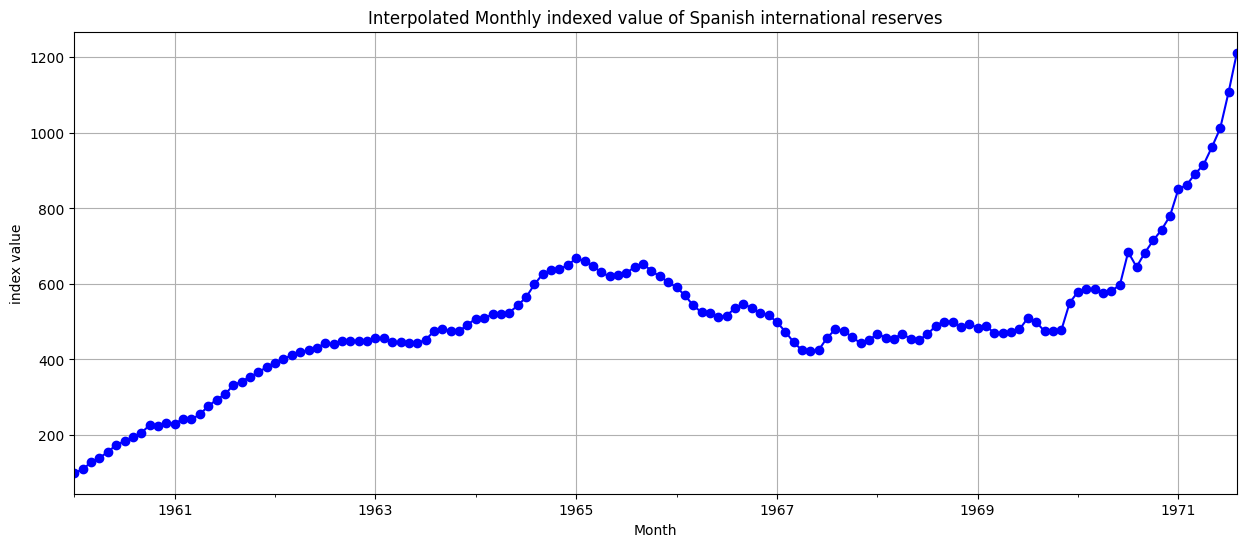

In [186]:
# Plot monthly time series
# Plotting indexed value of Spanish international reserves up till exit of US from Bretton woods in August 1971
plt.figure(figsize=(15, 6))
interpolated_Index_of_value_of_international_reserves[0:140].plot(kind='line', marker='o', color='blue', linestyle='-')
plt.title('Interpolated Monthly indexed value of Spanish international reserves')
plt.xlabel('Month')
plt.ylabel('index value')
plt.grid(True)
plt.show()

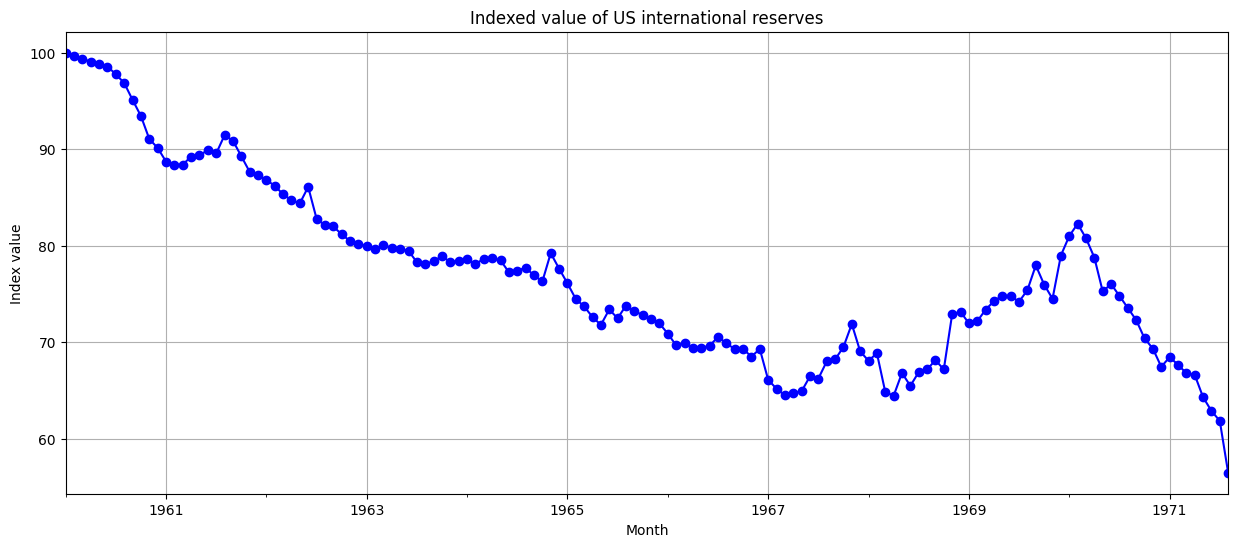

In [187]:
# Plot monthly time series
# Monthly time series of US indexed value of international reserves up till August 1971 and exit of Bretton Woods
plt.figure(figsize=(15, 6))
df_US_month_series['Index of value of international reserves'][0:140].plot(kind='line', marker='o', color='blue', linestyle='-')
plt.title('Indexed value of US international reserves')
plt.xlabel('Month')
plt.ylabel('Index value')
plt.grid(True)
plt.show()

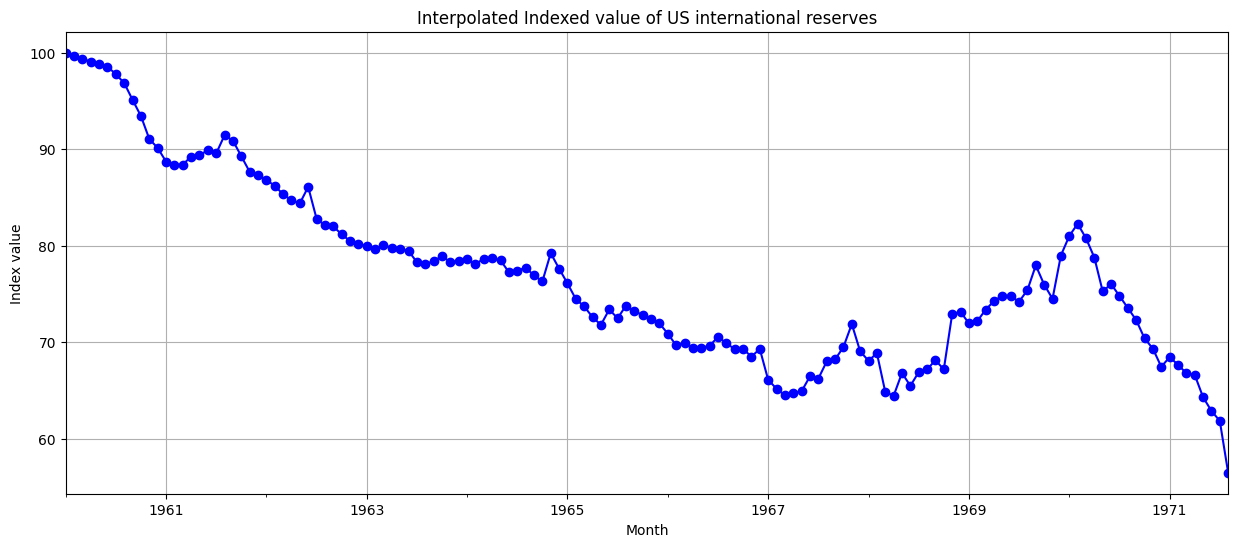

In [188]:
# Plot monthly time series
# Monthly time series of US indexed value of international reserves up till August 1971 and exit of Bretton Woods
plt.figure(figsize=(15, 6))
interpolated_US_index_of_value_of_international_reserves[0:140].plot(kind='line', marker='o', color='blue', linestyle='-')
plt.title('Interpolated Indexed value of US international reserves')
plt.xlabel('Month')
plt.ylabel('Index value')
plt.grid(True)
plt.show()

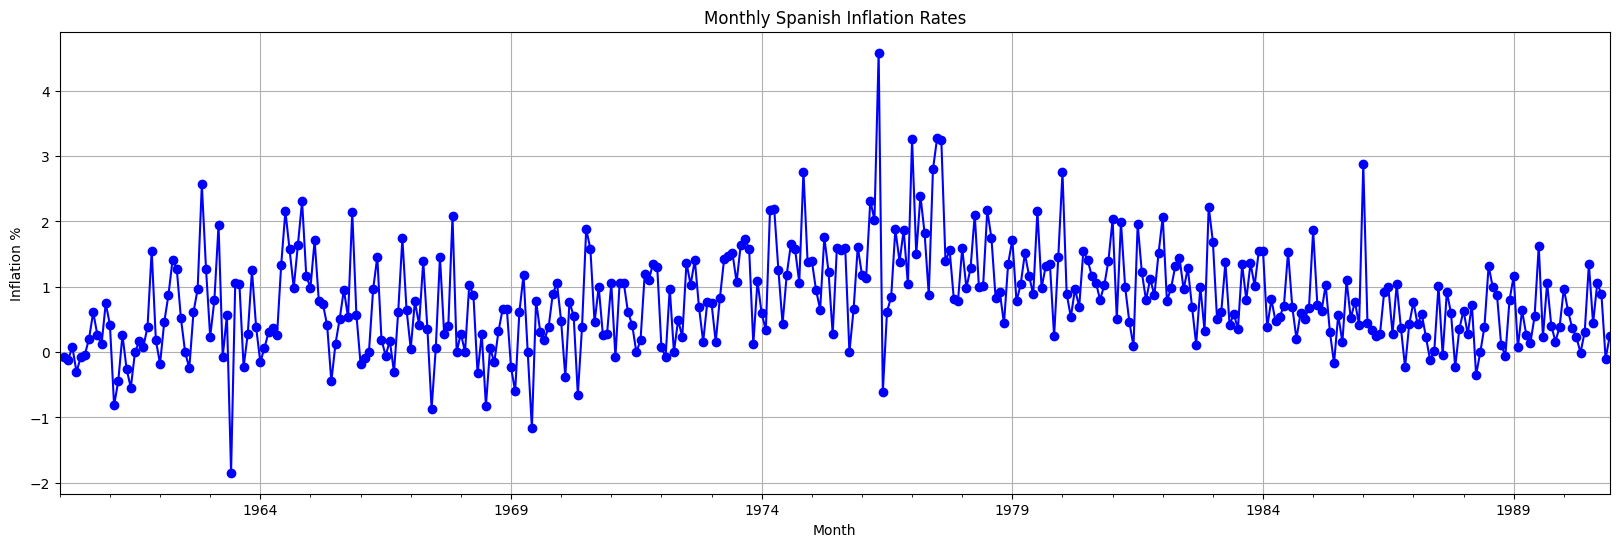

In [13]:
# Plot monthly time series of monthly inflation in Spain 
plt.figure(figsize=(20, 6))
df_month_series['Monthly Inflation Rate'].plot(kind='line', marker='o', color='blue', linestyle='-')
plt.title('Monthly Spanish Inflation Rates')
plt.xlabel('Month')
plt.ylabel('Inflation %')
plt.grid(True)
plt.show()

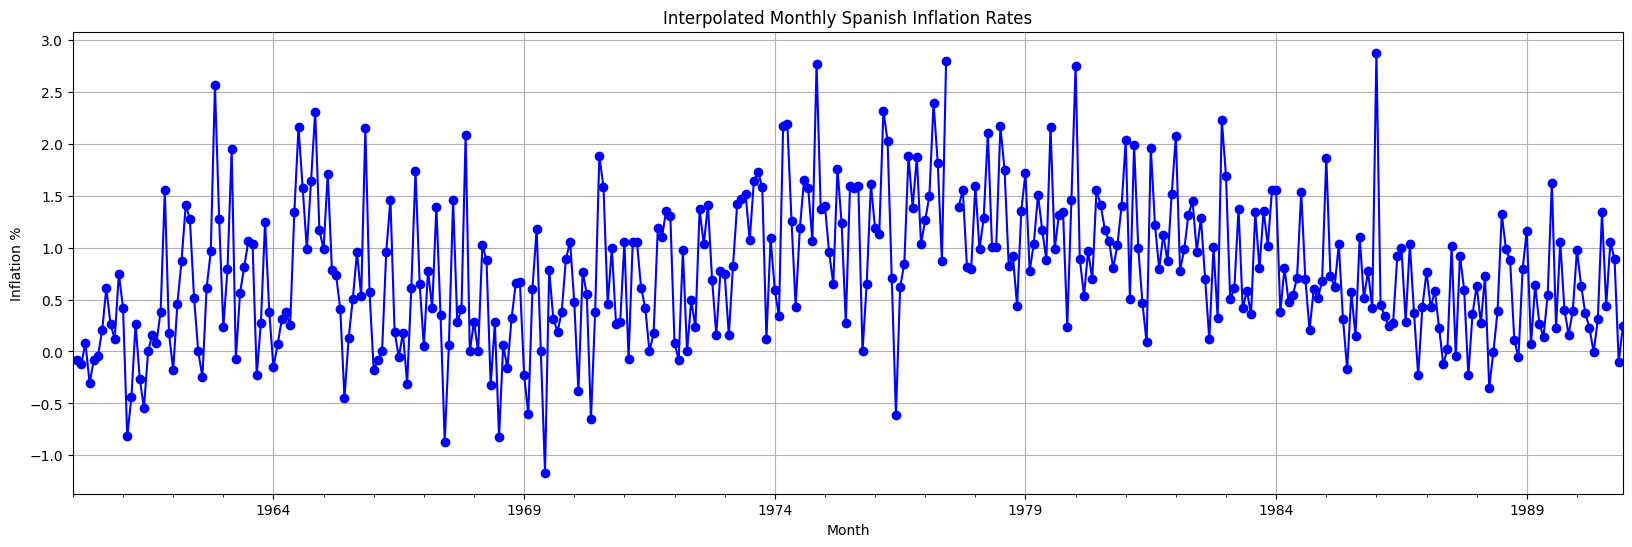

In [189]:
# Plot monthly time series of monthly inflation in Spain 
plt.figure(figsize=(20, 6))
interpolated_Monthly_inflation_rate.plot(kind='line', marker='o', color='blue', linestyle='-')
plt.title('Interpolated Monthly Spanish Inflation Rates')
plt.xlabel('Month')
plt.ylabel('Inflation %')
plt.grid(True)
plt.show()

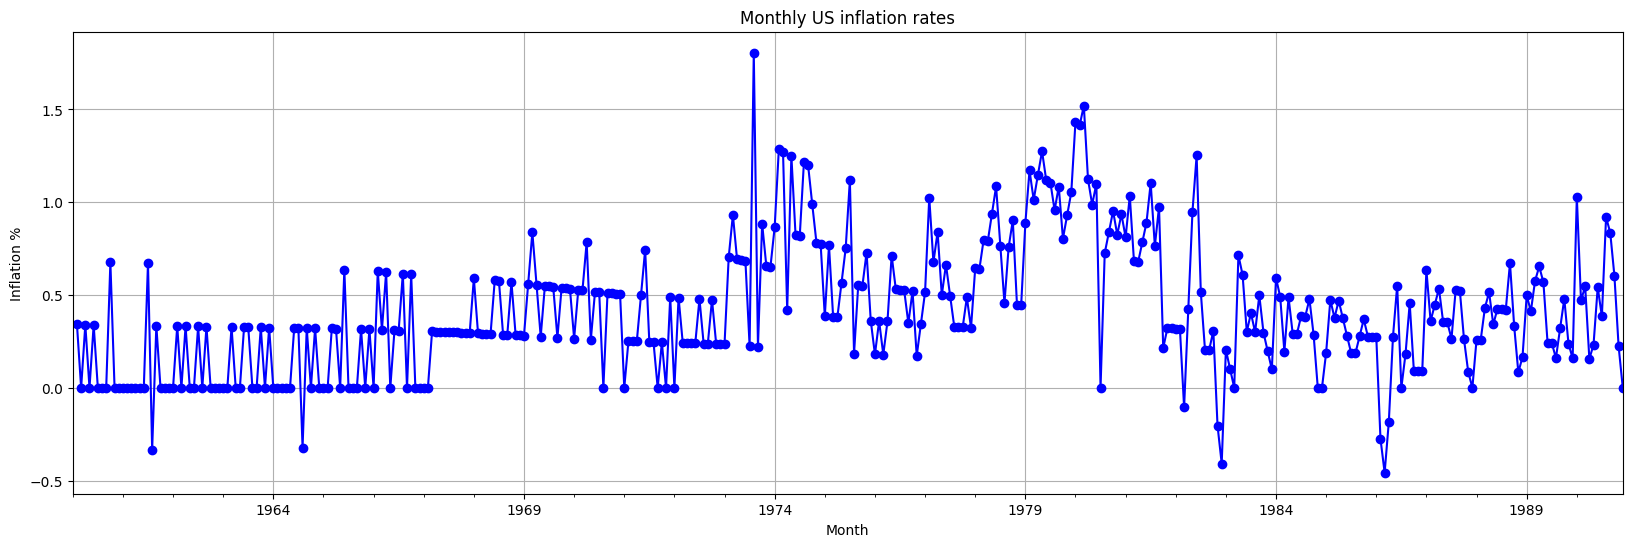

In [190]:
# Plot monthly time series of US inflation rates
plt.figure(figsize=(20, 6))
df_US_month_series['Monthly Inflation Rate'].plot(kind='line', marker='o', color='blue', linestyle='-')
plt.title('Monthly US inflation rates')
plt.xlabel('Month')
plt.ylabel('Inflation %')
plt.grid(True)
plt.show()

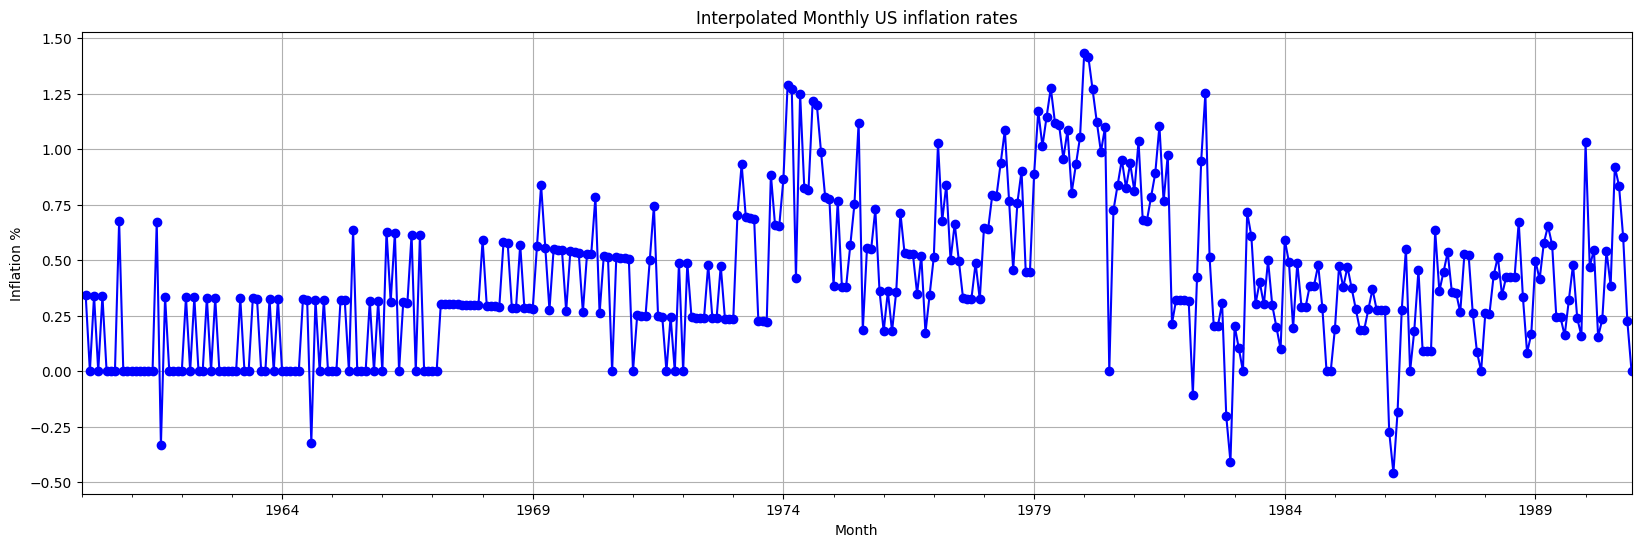

In [191]:
# Plot monthly time series of US inflation rates
plt.figure(figsize=(20, 6))
interpolated_Monthly_US_inflation_rate.plot(kind='line', marker='o', color='blue', linestyle='-')
plt.title('Interpolated Monthly US inflation rates')
plt.xlabel('Month')
plt.ylabel('Inflation %')
plt.grid(True)
plt.show()

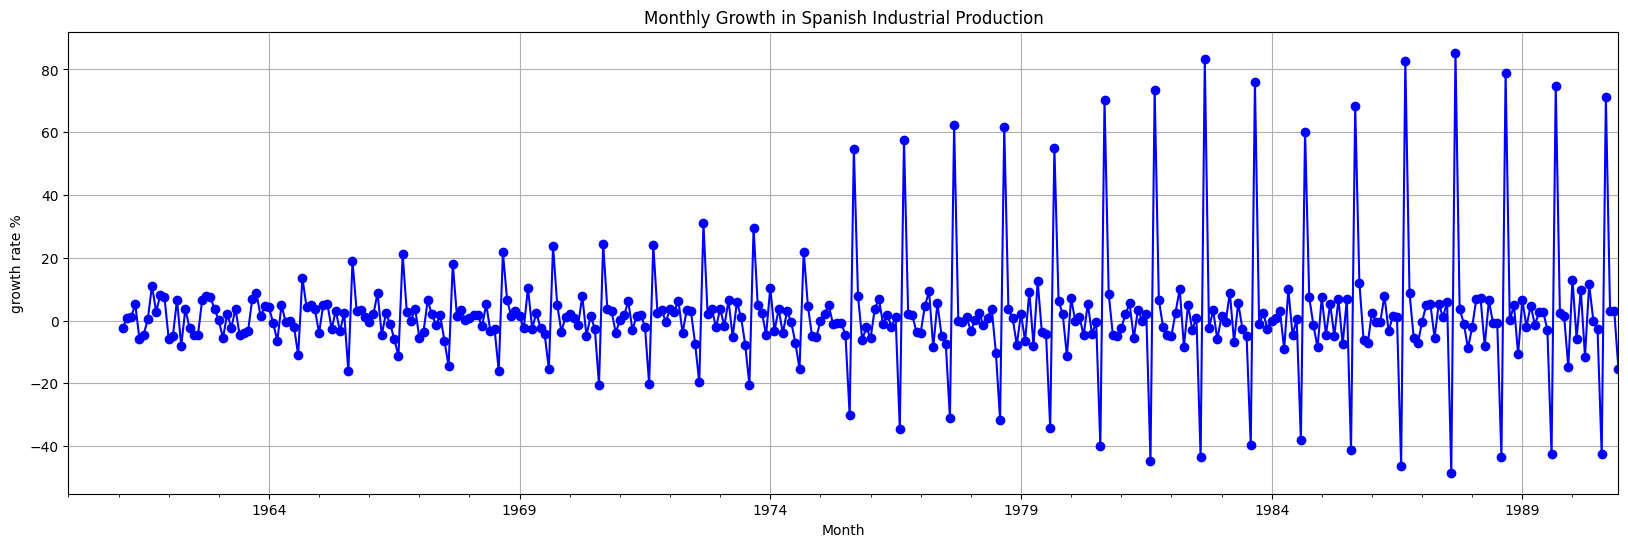

In [176]:
# Plot monthly time series of Monthly growth in Industrial Production in Spain 
plt.figure(figsize=(20, 6))
df_month_series['Monthly Growth in Industrial Production %'].plot(kind='line', marker='o', color='blue', linestyle='-')
plt.title('Monthly Growth in Spanish Industrial Production')
plt.xlabel('Month')
plt.ylabel('growth rate %')
plt.grid(True)
plt.show()

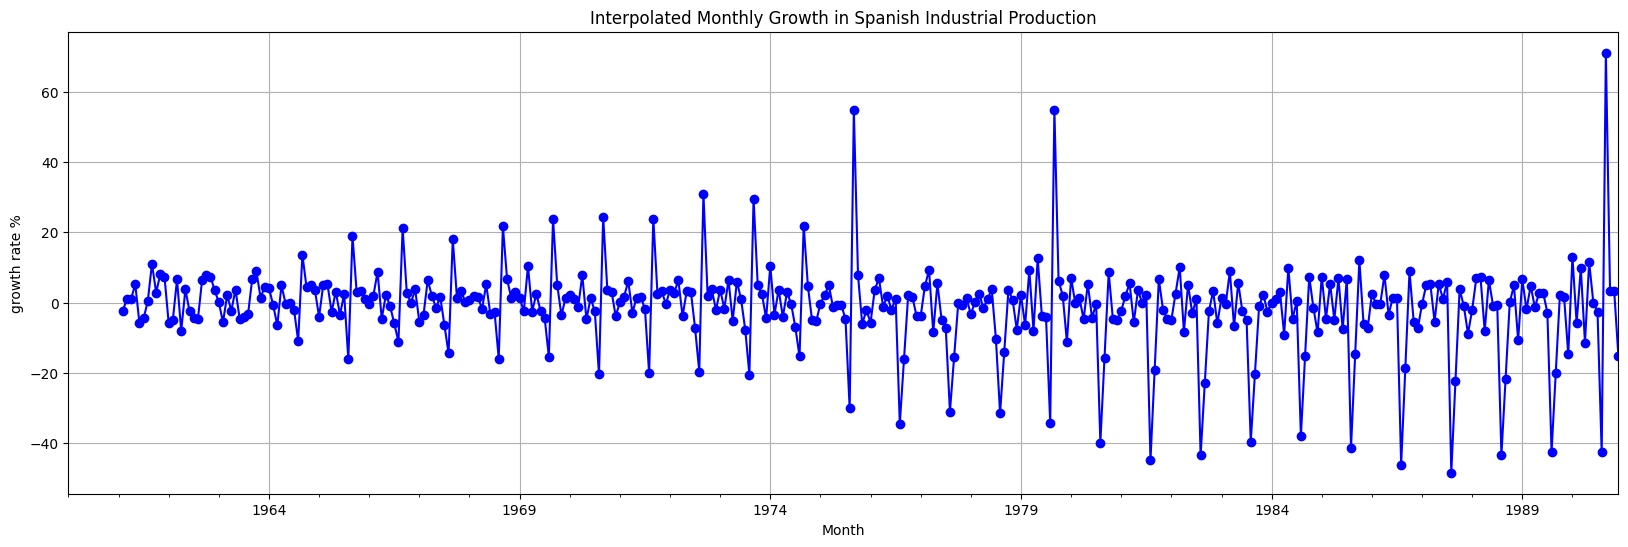

In [192]:
# Plot monthly time series of Monthly growth in Industrial Production in Spain 
plt.figure(figsize=(20, 6))
interpolated_Monthly_growth_in_Industrial_Production.plot(kind='line', marker='o', color='blue', linestyle='-')
plt.title('Interpolated Monthly Growth in Spanish Industrial Production')
plt.xlabel('Month')
plt.ylabel('growth rate %')
plt.grid(True)
plt.show()

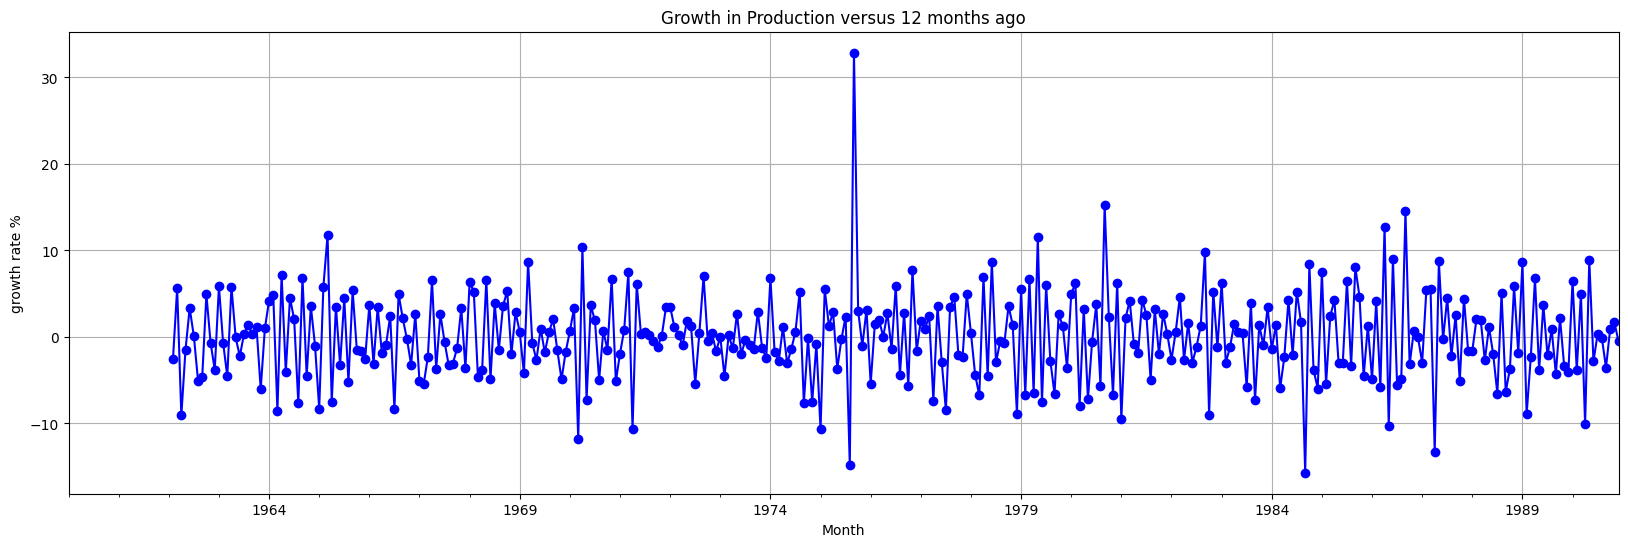

In [240]:
# Plot monthly time series of growth in monthly production versus 12 months ago in Spain 
plt.figure(figsize=(20, 6))
df_month_series['Growth in Production versus 12 months ago'].plot(kind='line', marker='o', color='blue', linestyle='-')
plt.title('Growth in Production versus 12 months ago')
plt.xlabel('Month')
plt.ylabel('growth rate %')
plt.grid(True)
plt.show()

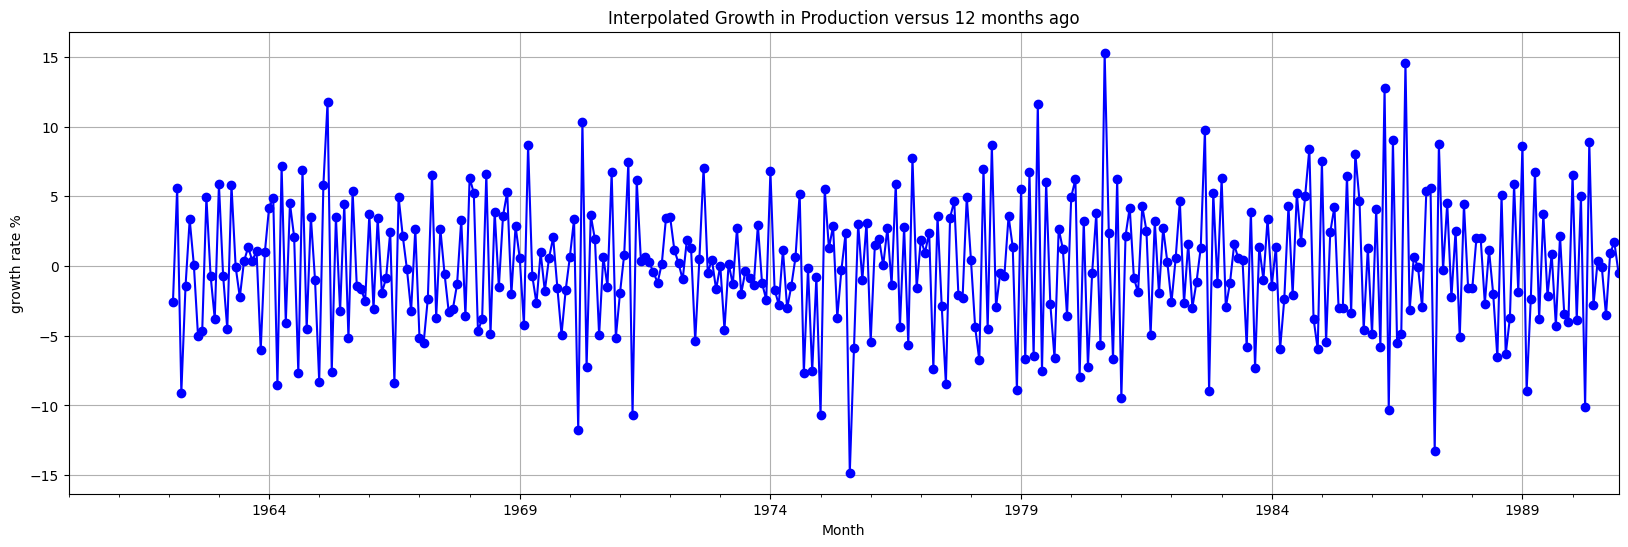

In [239]:
# Plot monthly time series of growth in monthly production versus 12 months ago in Spain 
plt.figure(figsize=(20, 6))
interpolated_Growth_in_production_versus_12_months_ago.plot(kind='line', marker='o', color='blue', linestyle='-')
plt.title('Interpolated Growth in Production versus 12 months ago')
plt.xlabel('Month')
plt.ylabel('growth rate %')
plt.grid(True)
plt.show()

Comparison of Statistics 5.3.3

In [234]:
# First define a variable that stores the difference between our countries inflation rate and the US
# Calculated by using Spanish inflation rate minus US inflation rate
interpolated_df_month_series['Difference between Spain and US inflation rates'] = interpolated_df_month_series['Monthly Inflation Rate']\
                                                                     - interpolated_df_US_month_series['Monthly Inflation Rate']
difference_between_spain_and_US_inflation = interpolated_df_month_series['Difference between Spain and US inflation rates']


In [237]:
interpolated_df_month_series['Growth in Production versus 12 months ago'][156:].std()

5.051685966138078

In [236]:
print(interpolated_df_month_series['Growth in Production versus 12 months ago'][0:139].std())

4.667661592694721


In [238]:
# Standard deviation calculations for monthly growth of nominal and real exchange rates
# Standard deviation calculations for monthly inflation and difference in inflation and 12 monthly industrial growth
before_Bretton = {
    'std monthly growth nominal exch rates': interpolated_df_month_series['Monthly Growth in Nominal Exchange Rate %'][0:139].std(),
    'std monthly growth real exch rates': interpolated_df_month_series['Monthly growth in Real exchange rate %'][0:139].std(),
    'std monthly inflation rates': interpolated_df_month_series['Monthly Inflation Rate'][0:139].std(),
    'std difference in inflation between Spain and US': interpolated_df_month_series['Difference between Spain and US inflation rates'][0:139].std(),
    'std 12 monthly industrial growth': interpolated_df_month_series['Growth in Production versus 12 months ago'][0:139].std()
}
#Before and after Bretton dictionaries for data 
after_Bretton = {
     'std monthly growth nominal exch rates': interpolated_df_month_series['Monthly Growth in Nominal Exchange Rate %'][156:].std(),
    'std monthly growth real exch rates': interpolated_df_month_series['Monthly growth in Real exchange rate %'][156:].std(),
    'std monthly inflation rates': interpolated_df_month_series['Monthly Inflation Rate'][156:].std(),
    'std difference in inflation between Spain and US': interpolated_df_month_series['Difference between Spain and US inflation rates'][156:].std(),
    'std 12 monthly industrial growth': interpolated_df_month_series['Growth in Production versus 12 months ago'][156:].std()
}
#Create Dataframes
df_before_bretton = pd.DataFrame(before_Bretton, index = ['Before Bretton'])
df_after_bretton = pd.DataFrame(after_Bretton, index = ['After Bretton'])
#Concatenate them vertically
df_comparison_statistics = pd.concat([df_before_bretton, df_after_bretton], ignore_index=False)
#Calculate row of ratios for the standard deviations
ratio_row = df_comparison_statistics.loc['After Bretton'] / df_comparison_statistics.loc['Before Bretton']
ratio_row.name = 'Ratio of standard deviations'
df_comparison_statistics = pd.concat([df_comparison_statistics, ratio_row.to_frame().transpose()], axis=0)
df_comparison_statistics

,std monthly growth nominal exch rates,std monthly growth real exch rates,std monthly inflation rates,std difference in inflation between Spain and US,std 12 monthly industrial growth
Before Bretton,0.000000,0.769992,0.695380,0.759622,4.667662
After Bretton,2.273664,2.157478,0.648206,0.656942,5.051686
Ratio of standard deviations,inf,2.801948,0.932161,0.864827,1.082273


Merging of the two data frames

In [197]:
# This creates a merged dataframe that concatenates and puts Spain on top of the US dataframe
merged_df = pd.concat([df_Spain, df_US], ignore_index=True)

This is where we print out our merged dataframe in full 

In [ ]:
# Already used a line of code merged_df = merged_df.drop(373) to delete redundant row of headers for the US data
# Used the pd.set_option in order to display all 746 rows of the merged dataframe - note can't do random numbers for this.
# Only works for a certain few: 5, 10, all 746
# In the merged dataframe, there is no data for the year of 1960 in Spain, there is no data at all in the first 12 months
# Therefore, this makes interpolating the data very difficult here and we have left it blank 
# Filled in all the NaN values with '' to make it look nicer.
# Empty columns for the US data is because we only have 2 columns of data - international reserves and CPI per the coursework instructions.
# Any outliers were defined as being +- 3 standard deviations away from the mean of the series
pd.set_option('display.max_rows', 746)
merged_df = merged_df.fillna('')
merged_df